# Henry Ezeanowi - 8900446
# Lab 2

## Part A

In [334]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [292]:
df = pd.read_csv("Lab2_dataset.csv")
df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
5,2949,ham,Subject: ehronline web address change\nthis me...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\nwe agr...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


Checking for missing values

In [293]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

Create the dependent and independent variable

In [294]:
X = df["text"]
y = df["label_num"]

Converting text to numbers using Count Vectorization

In [295]:
cv = CountVectorizer()
X = cv.fit_transform(X.values)
X.toarray()[:2]

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Split the features and targets into train and test sets


In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 16)

### Multinomial Naive Bayes

Training the model using Multinomial Naive Bayes Classifier

In [297]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

Predict using test data

In [298]:
y_pred_mnb = mnb.predict(X_test)

y_pred_mnb

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [299]:
y_test

4850    1
3428    0
2802    0
1868    1
4597    0
       ..
2035    0
3847    0
1008    0
2731    0
2026    0
Name: label_num, Length: 1293, dtype: int64

Accuracy score on Multinomial Naive Bayes

In [300]:
accuracy_score(y_test,y_pred_mnb)

0.9783449342614076

Confusion matrix on Multinomial Naive Bayes

In [301]:
confusion_matrix(y_test,y_pred_mnb)

array([[906,  11],
       [ 17, 359]], dtype=int64)

Cross validation on Multinomial Naive Bayes

In [302]:
mnbCv_scores = cross_val_score(mnb, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross validation accuracy scores:", mnbCv_scores)
print("Mean score:", mnbCv_scores.mean())

Cross validation accuracy scores: [0.97680412 0.97938144 0.9806701  0.97290323 0.97935484]
Mean score: 0.9778227469238443


### Gaussian Naive Bayes

Training the model using Gaussian Naive Bayes Classifier

In [303]:
gnb = GaussianNB()
gnb.fit(X_train.toarray(),y_train)

GaussianNB()

Predict using test data

In [304]:
y_pred_gnb = gnb.predict(X_test.toarray())

y_pred_gnb

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [305]:
y_test

4850    1
3428    0
2802    0
1868    1
4597    0
       ..
2035    0
3847    0
1008    0
2731    0
2026    0
Name: label_num, Length: 1293, dtype: int64

Accuracy score on Gaussian Naive Bayes

In [306]:
accuracy_score(y_test, y_pred_gnb)

0.9644238205723125

Confusion matrix on Gaussian Naive Bayes

In [307]:
confusion_matrix(y_test, y_pred_gnb)

array([[905,  12],
       [ 34, 342]], dtype=int64)

Cross validation on Gaussian Naive Bayes

In [308]:
gnbCv_scores = cross_val_score(gnb, X_train.toarray(), y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross validation accuracy scores:", gnbCv_scores)
print("Mean score:", gnbCv_scores.mean())

Cross validation accuracy scores: [0.95489691 0.95360825 0.96391753 0.95354839 0.96258065]
Mean score: 0.9577103425340872


## Observation

### Based on the performance metrics(accuracy, confusion matrix and mean cross validation score) of both the multinomial Naive Bayes and Gaussian Naive Bayes models, it can be said that the multinomial Naive Bayes classifier performs better compared to the Gaussian Naive Bayes classifier.


## Part B

In [309]:
df_2 = pd.read_csv("AB_NYC_2019.csv")
df_2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Check size of the data

In [310]:
df_2.shape

(48895, 16)

Create a column for Price per Night

In [311]:
df_2["price_per_night"] = df_2["price"]/df_2["minimum_nights"]
df_2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,50.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8.0


Check for missing values in price_per_night column

In [312]:
df_2.price_per_night.isnull().sum()

0

Summary statistics of price_per_night column

In [313]:
df_2_desc = df_2.price_per_night.describe()
df_2_desc

count    48895.000000
mean        70.174247
std        157.620388
min          0.000000
25%         20.000000
50%         44.500000
75%         81.500000
max       8000.000000
Name: price_per_night, dtype: float64

Visualizing price_per_night

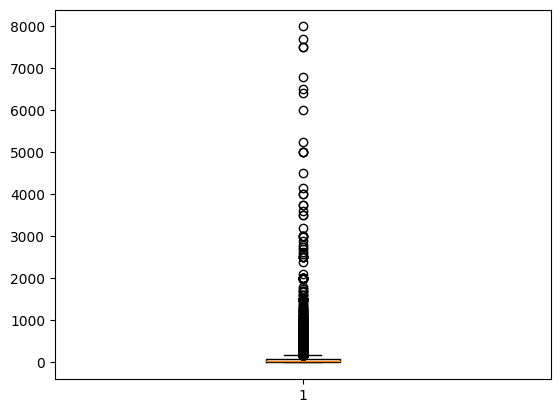

In [314]:
plt.boxplot(df_2.price_per_night)
plt.show()

Mean of price per night column with outliers

In [315]:
df_2["price_per_night"].mean()

70.17424725447543

Median of price per night column with outliers

In [316]:

df_2["price_per_night"].median()

44.5

Upper quantile of price per night column with outliers

In [317]:
df_2["price_per_night"].quantile(1)

8000.0

Using Percentiles to remove outliers

1st Quantile

In [318]:
q1= df_2.price_per_night.quantile(0.01,interpolation = "higher")
q1

1.2333333333333334

99th Quantile

In [319]:
q99= df_2.price_per_night.quantile(0.99,interpolation = "lower")
q99

443.0

The outliers and its count

In [320]:
print("The count of outliers is:", df_2[(df_2.price_per_night < q1) | (df_2.price_per_night > q99)]["price_per_night"].count())

df_2[(df_2.price_per_night < q1) | (df_2.price_per_night > q99)].head(4)

The count of outliers is: 972


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365,0.583333
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7,800.000000
245,61509,"Quiet, clean midtown apt w. elevato",23619,Anna/Fonzy,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,2019-04-30,0.90,1,140,0.550000
349,94209,LARGE 1BR (CONV 2BR) CROWN HEIGHTS,503800,Sadatu,Brooklyn,Crown Heights,40.67473,-73.94494,Entire home/apt,100,90,0,NaN,NaN,1,365,1.111111


### *The number of ouliers are small compared to the total data, so we can remove them*

The dataset after the outliers have been removed using percentiles

In [321]:
df_2[(df_2.price_per_night >= q1) & (df_2.price_per_night <= q99)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.000000
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.000000
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,50.000000
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.000000
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,35.000000
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,10.000000
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,11.500000
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,55.000000


Mean of price per night column without outliers

In [322]:
df_2[(df_2.price_per_night >= q1) & (df_2.price_per_night <= q99)]["price_per_night"].mean()

61.089823898138405

Median of price per night column without outliers

In [323]:

df_2[(df_2.price_per_night >= q1) & (df_2.price_per_night <= q99)]["price_per_night"].median()

44.5

Upper quantile of price per night column without outliers

In [324]:
df_2[(df_2.price_per_night >= q1) & (df_2.price_per_night <= q99)]["price_per_night"].quantile(1)

443.0

Removing outliers with IQR

In [325]:
df_2_desc

count    48895.000000
mean        70.174247
std        157.620388
min          0.000000
25%         20.000000
50%         44.500000
75%         81.500000
max       8000.000000
Name: price_per_night, dtype: float64

Getting the IQR of price_per_night

In [326]:
Q1 = df_2.price_per_night.quantile(0.25)
Q3 = df_2.price_per_night.quantile(0.75)
IQR = Q3 - Q1
IQR

61.5

Getting the lower bound and upper bound

In [327]:
lb = Q1 - (1.5 * IQR)
lb = lb if(lb >= min(df_2.price_per_night)) else min(df_2.price_per_night) 
ub = Q3 + (1.5 * IQR)

print("The lower bound and upper bound respectively:", lb, "and", ub)


The lower bound and upper bound respectively: 0.0 and 173.75


Checking the count of outliers

In [328]:
df_2[(df_2.price_per_night < lb) | (df_2.price_per_night > ub)]["price_per_night"].count()

3333

### *The number of ouliers are small compared to the total data, so we can remove them*

The dataset after the outliers have been removed using IQR

In [329]:
df_2_new = df_2[(df_2.price_per_night >= lb) & (df_2.price_per_night <= ub)]
df_2_new

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.000000
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,50.000000
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.000000
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8.000000
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,66.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,35.000000
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,10.000000
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,11.500000
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,55.000000


Visualizing price_per_night without outliers

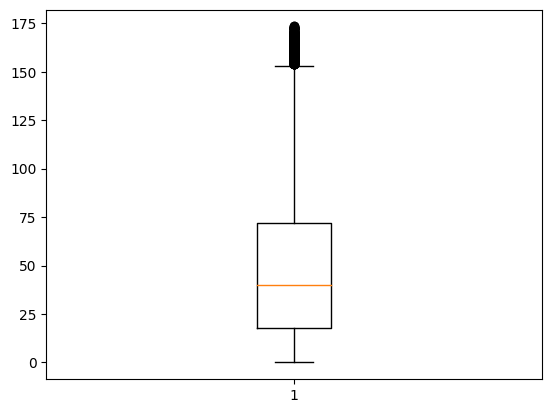

In [330]:
plt.boxplot(df_2_new.price_per_night)
plt.show()

Mean of price per night column without outliers

In [331]:
df_2[(df_2.price_per_night >= lb) & (df_2.price_per_night <= ub)]["price_per_night"].mean()

49.181726584663394

Median of price per night column without outliers

In [332]:
df_2[(df_2.price_per_night >= lb) & (df_2.price_per_night <= ub)]["price_per_night"].median()

40.0

Upper quantile of price per night column without outliers

In [333]:
df_2[(df_2.price_per_night >= lb) & (df_2.price_per_night <= ub)]["price_per_night"].quantile(1)

173.33333333333334